In [1]:
from datetime import datetime
import csidata as cid
from os.path import basename, splitext
import glob

In [2]:
csi_dir = 'recordings/csi/'
video_dir = 'recordings/video/'
files = glob.glob('2024-10-21*.raw', root_dir=csi_dir)
len(files)

20

In [3]:
offsets = {}
for file in files:
    print(basename(file))
    csi_time = cid.load(csi_dir + file).status[0].tstamp
    csi_time = datetime.fromtimestamp(csi_time/1e6)

    name_time = datetime.strptime(splitext(file)[0], '%Y-%m-%dT%H-%M-%S-%f')

    with open(video_dir + splitext(file)[0] + '.txt') as f:
        for line in f:
            # is a number?
            if line.strip().isdigit():
                ts = int(line.strip())
                break
    # print(ts)
    first_frame_time = datetime.fromtimestamp(ts/1e3)
    # first_frame_time
    offsets[file] = (first_frame_time - csi_time).total_seconds()

2024-10-21T17-54-30-682514.raw
2024-10-21T17-56-18-620789.raw
2024-10-21T17-54-50-275849.raw
2024-10-21T17-54-21-090414.raw
2024-10-21T19-22-56-923882.raw
2024-10-21T17-58-43-935003.raw
2024-10-21T17-53-52-546798.raw
2024-10-21T17-54-11-987056.raw
2024-10-21T17-54-58-691021.raw
2024-10-21T17-57-43-638928.raw
2024-10-21T17-55-07-363039.raw
2024-10-21T17-56-39-244853.raw
2024-10-21T17-58-23-918603.raw
2024-10-21T17-57-51-806010.raw
2024-10-21T17-56-28-980901.raw
2024-10-21T17-54-03-290437.raw
2024-10-21T17-54-41-346455.raw
2024-10-21T17-55-57-149391.raw
2024-10-21T17-58-08-430561.raw
2024-10-21T19-23-12-972966.raw


<Axes: >

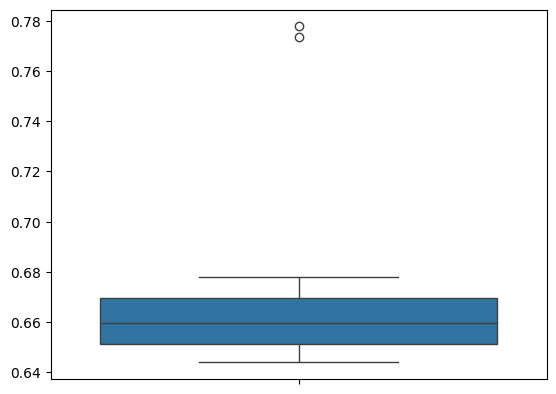

In [4]:
import seaborn as sns

sns.boxplot(list(offsets.values()))

In [5]:
offsets

{'2024-10-21T17-54-30-682514.raw': 0.666454,
 '2024-10-21T17-56-18-620789.raw': 0.668016,
 '2024-10-21T17-54-50-275849.raw': 0.66391,
 '2024-10-21T17-54-21-090414.raw': 0.650765,
 '2024-10-21T19-22-56-923882.raw': 0.659969,
 '2024-10-21T17-58-43-935003.raw': 0.643899,
 '2024-10-21T17-53-52-546798.raw': 0.773441,
 '2024-10-21T17-54-11-987056.raw': 0.674515,
 '2024-10-21T17-54-58-691021.raw': 0.658949,
 '2024-10-21T17-57-43-638928.raw': 0.650976,
 '2024-10-21T17-55-07-363039.raw': 0.673725,
 '2024-10-21T17-56-39-244853.raw': 0.777822,
 '2024-10-21T17-58-23-918603.raw': 0.650269,
 '2024-10-21T17-57-51-806010.raw': 0.651047,
 '2024-10-21T17-56-28-980901.raw': 0.6514,
 '2024-10-21T17-54-03-290437.raw': 0.665828,
 '2024-10-21T17-54-41-346455.raw': 0.677995,
 '2024-10-21T17-55-57-149391.raw': 0.659088,
 '2024-10-21T17-58-08-430561.raw': 0.659234,
 '2024-10-21T19-23-12-972966.raw': 0.659527}